#Group-30
Members:</br>
1.Ashi Sahu(MT20051)</br>
2.Tanishi Srivastava(MT20079)</br>
3.Lokesh Malkani(MT20076)


#Import:

In [ ]:

########################################################################################################################
#_____________________________________________________Import Section___________________________________________ 
########################################################################################################################




import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import os
import cv2
import scipy.io as sio
import ntpath
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input
# importing the libraries
from keras.models import Model
from keras.applications import VGG16
#from keras.preprocessing import image


#Loading the data from MAT File For Encoding the Data:

In [ ]:
#sio.savemat('/content/drive/MyDrive/Colab Notebooks/Cgas project/tarin_data11.mat', train_data)
#sio.savemat('/content/drive/MyDrive/Colab Notebooks/Cgas project/test_data.mat', test_data)
train_data = sio.loadmat('/content/drive/MyDrive/Karent/Cgas project/train_data11.mat')

test_data = sio.loadmat('/content/drive/MyDrive/Karent/Cgas project/test_data11.mat')

In [ ]:
train = train_data['X_train']
y_train = train_data['y_train']
test = test_data['X_test']
y_test = test_data['y_test']

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


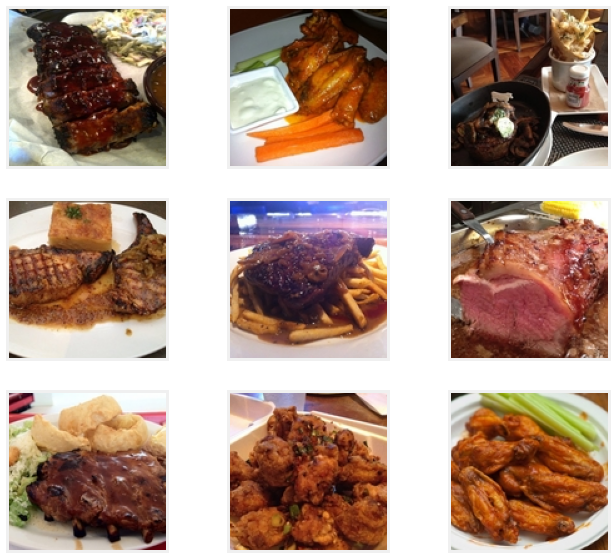

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train[i])
plt.show()

In [ ]:
# Normalize pixel values to be between 0 and 1
train = np.array(train)
train = train / 255.0
test = np.array(test)
test = test/255.0

In [ ]:
train.shape

(7632, 128, 128, 3)

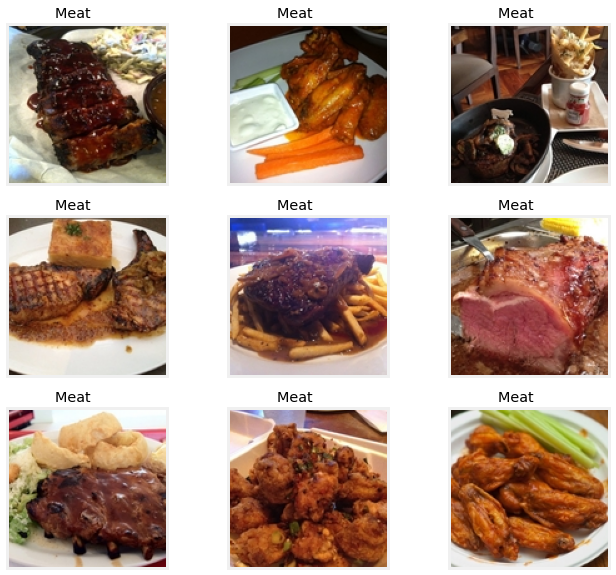

In [ ]:
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False) 
    plt.imshow(train[i])#Image
    plt.title(y_train[i])#Labels
plt.show()

 **Integer and Hot Encoding of labels**

In [ ]:
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
label_encoder = LabelEncoder()
int_encoded = label_encoder.fit_transform(y_train)
test_int_encoded = label_encoder.fit_transform(y_test)
print(int_encoded)

[3 3 3 ... 9 9 9]


In [ ]:
print(set(int_encoded))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10}


In [ ]:
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
int_encoded = int_encoded.reshape(len(int_encoded), 1)
train_encoded = onehot_encoder.fit_transform(int_encoded)
print(train_encoded)
print("test encoded: ")
test_int_encoded = test_int_encoded.reshape(len(test_int_encoded), 1)
test_encoded = onehot_encoder.fit_transform(test_int_encoded)
print(test_encoded)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]]
test encoded: 
[[0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]


***Defining Model Architecture***

#**VGG16:**

Image Fetch & Preprocess:



In [ ]:
########################################################################################################################
#_____________________________________________________Image Preprocessing & Train Test Generates__________________________________________ 
########################################################################################################################


IMAGE_SIZE = [128, 128]  

training_dir='/content/drive/MyDrive/Karent/Cgas project/training_cat'
validation_dir='/content/drive/MyDrive/Karent/Cgas project/testing_cat'

#---------------------------------------

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.4) # all pixel values will be between 0 an 1

test_datagen = ImageDataGenerator(rescale=1./255)# all pixel values will be between 0 an 1
                                   

# test_datagen = ImageDataGenerator(rescale = 1./255)


#Train and Validation SPlit
   #& 
#Test Is Seperate
training_set = train_datagen.flow_from_directory(training_dir, target_size = IMAGE_SIZE,subset="training", batch_size = 200, class_mode = 'categorical')
                                                

validation_set = train_datagen.flow_from_directory(training_dir, target_size = IMAGE_SIZE,subset="validation", batch_size = 200, class_mode = 'categorical')
                                               
                                                

test_set = test_datagen.flow_from_directory(validation_dir, target_size = IMAGE_SIZE, batch_size = 200, class_mode = 'categorical')
                                           


Found 5856 images belonging to 11 classes.
Found 3899 images belonging to 11 classes.
Found 3347 images belonging to 11 classes.


Code To Create Base Model:

In [ ]:
########################################################################################################################
#_____________________________________________________Model Bilding Here___________________________________________ 
########################################################################################################################

IMAGE_SIZE = [128, 128]  # we will keep the image size as (64,64). You can increase the size for better results. 

# loading the weights of VGG16 without the top layer. These weights are trained on Imagenet dataset.
vgg = VGG16(input_shape = IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)  # input_shape = (64,64,3) as required by VGG

# this will exclude the initial layers from training phase as there are already been trained.
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
x = Dense(128, activation = 'relu')(x)   # we can add a new fully connected layer but it will increase the execution time.
x = Dense(11, activation = 'softmax')(x)  # adding the output layer with softmax function as this is a multi label classification problem.

model = Model(inputs = vgg.input, outputs = x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
########################################################################################################################
#_____________________________________________________History To Fit The Models:___________________________________________ 
########################################################################################################################


history = model.fit_generator(training_set,
                   epochs = 10, 
                   validation_data = validation_set
                   )  # this should be equal to total number of images in validation set.


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
30/30 [==============================] - 2637s 88s/step - loss: 1.7472 - accuracy: 0.4225 - val_loss: 1.3184 - val_accuracy: 0.5581
Epoch 2/10
30/30 [==============================] - 21s 702ms/step - loss: 1.0708 - accuracy: 0.6407 - val_loss: 1.2110 - val_accuracy: 0.5860
Epoch 3/10
30/30 [==============================] - 21s 715ms/step - loss: 0.8500 - accuracy: 0.7182 - val_loss: 1.1630 - val_accuracy: 0.6084
Epoch 4/10
30/30 [==============================] - 21s 712ms/step - loss: 0.6899 - accuracy: 0.7864 - val_loss: 1.1864 - val_accuracy: 0.5984
Epoch 5/10
30/30 [==============================] - 21s 709ms/step - loss: 0.5688 - accuracy: 0.8333 - val_loss: 1.1106 - val_accuracy: 0.6214
Epoch 6/10
30/30 [==============================] - 21s 710ms/step - loss: 0.4902 - accuracy: 0.8615 - val_loss: 1.1427 - val_accuracy: 0.6243
Epoch 7/10
30/30 [==============================] - 22s 727ms/step

In [ ]:
########################################################################################################################
#_____________________________________________________Save ANd Load The History & Models:___________________________________________ 
########################################################################################################################


#HISTORY:

import json
# Get the dictionary containing each metric and the loss for each epoch
history_dict={}
# history_dict = history.history
# Save it under the form of a json file

# json.dump(history_dict, open('/content/drive/MyDrive/Karent/Models/VGG16 History/history.json', 'w'))
history_dict = json.load(open('/content/drive/MyDrive/Karent/Models/VGG16 History/history.json', 'r'))


#Save & Load The Models:

# model.save('/content/drive/MyDrive/Karent/Models/VGG16')
model = tf.keras.models.load_model('/content/drive/MyDrive/Karent/Models/VGG16')




In [ ]:
model.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)      

In [ ]:
history_dict["accuracy"]

[0.42247268557548523,
 0.6407103538513184,
 0.7182376980781555,
 0.7863729596138,
 0.8333333134651184,
 0.8615095615386963,
 0.8951502442359924,
 0.9272540807723999,
 0.9363046288490295,
 0.9564549326896667]

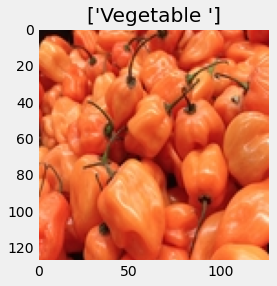

In [ ]:
########################################################################################################################
#_____________________________________________________Image Prediction Tests:___________________________________________ 
########################################################################################################################




#Recieve The Image To Predict Heres

image = cv2.imread('/content/drive/MyDrive/Karent/Cgas project/testing_cat/Vegetable_Fruit/Vegetable_Fruit_0.jpg')

#Adding The RGB:
img = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
image=img

#Resizing The mages If Not in Already:
newsize = (128, 128,3) 
img.resize(newsize)


#Prediction Tests Heres after REshaping:
img = np.reshape(img, ((-1,128, 128, 3)))
y = model.predict(img)

#Getting The Label
inverted = label_encoder.inverse_transform([argmax(y)]) 


#Disply the Image And Label
plt.imshow(image)
plt.title(inverted)
plt.grid(False)
plt.show()


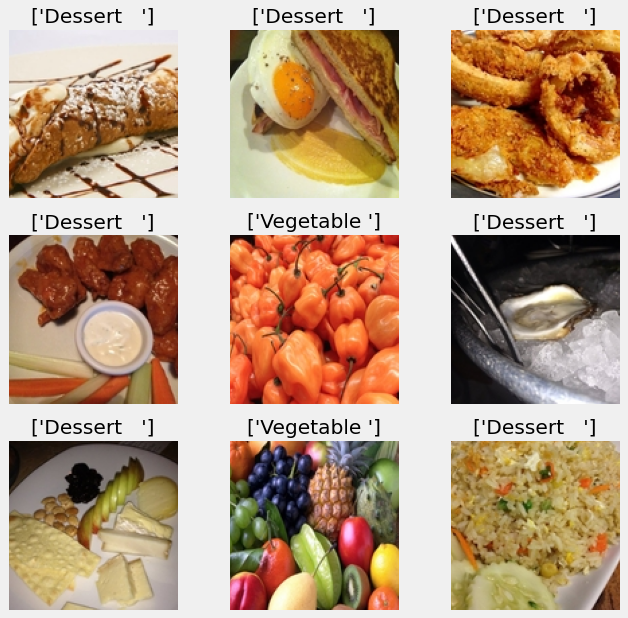

In [ ]:
images=["/content/drive/MyDrive/Karent/Cgas project/testing_cat/Dessert/Dessert_0.jpg",
        "/content/drive/MyDrive/Karent/Cgas project/testing_cat/Egg/Egg_0.jpg",
        "/content/drive/MyDrive/Karent/Cgas project/testing_cat/Fried food/Fried food_10.jpg",
        "/content/drive/MyDrive/Karent/Cgas project/testing_cat/Meat/Meat_10.jpg",
        "/content/drive/MyDrive/Karent/Cgas project/testing_cat/Vegetable_Fruit/Vegetable_Fruit_0.jpg",
        "/content/drive/MyDrive/Karent/Cgas project/testing_cat/Seafood/Seafood_0.jpg",
        "/content/drive/MyDrive/Karent/Cgas project/testing_cat/dairy_product/dairy_product_0.jpg",
        "/content/drive/MyDrive/Karent/Cgas project/testing_cat/Vegetable_Fruit/Vegetable_Fruit_101.jpg",
        "/content/drive/MyDrive/Karent/Cgas project/testing_cat/Rice/Rice_1.jpg"
        ]


from PIL import Image
j = 0
plt.figure(figsize=(10,10))
for i in images:
  img = cv2.imread(i)
  img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
  newsize = (128, 128,3)
  img.resize(newsize)
  img = np.reshape(img, ((-1,128, 128, 3)))
  y = model.predict(img)
  inverted = label_encoder.inverse_transform([argmax(y)]) 
  img = cv2.imread(i)
  img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
  plt.subplot(3,3,j+1)
  j = j + 1
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.title(inverted)
  plt.grid(False)
plt.show()

In [ ]:
########################################################################################################################
#_____________________________________________________Test Score & Accuracy Check:___________________________________________ 
########################################################################################################################

score = model.evaluate(test_set)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])


17/17 [==============================] - 858s 50s/step - loss: 1.1201 - accuracy: 0.6600
Test Loss: 1.12014639377594
Test accuracy: 0.6599940061569214


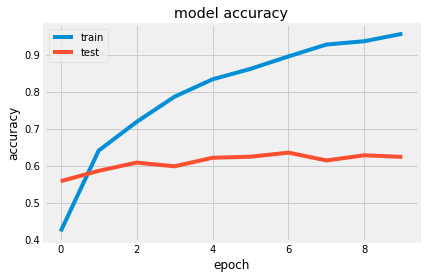

In [ ]:
########################################################################################################################
#_____________________________________________________Model Accuracy Plot:___________________________________________ 
########################################################################################################################



plt.plot(history_dict['accuracy'])
plt.plot(history_dict['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

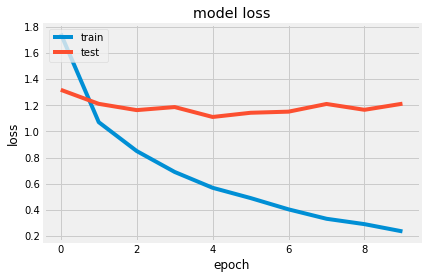

In [ ]:
########################################################################################################################
#_____________________________________________________Model Losss Plot:___________________________________________ 
########################################################################################################################




plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



#======================================================   END   =============================================================

#RESNET:

In [ ]:
########################################################################################################################
#_____________________________________________________Image Preprocessing & Train Test Generates__________________________________________ 
########################################################################################################################




from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import preprocess_input


IMAGE_SIZE = [128, 128]  

training_dir='/content/drive/MyDrive/Karent/Cgas project/training_cat'
validation_dir='/content/drive/MyDrive/Karent/Cgas project/testing_cat'

#---------------------------------------

train_datagen = ImageDataGenerator(rescale=1./255,
                                    validation_split=0.4)

test_datagen = ImageDataGenerator(rescale=1./255)

#Train and Validation SPlit

#Test Is Seperate
training_set = train_datagen.flow_from_directory(training_dir, target_size = IMAGE_SIZE,subset="training", batch_size = 200, class_mode = 'categorical')
                                               

validation_set = train_datagen.flow_from_directory(training_dir, target_size = IMAGE_SIZE,subset="validation", batch_size = 200, class_mode = 'categorical')
                                               
                                                

test_set = test_datagen.flow_from_directory(validation_dir, target_size = IMAGE_SIZE, batch_size = 200, class_mode = 'categorical')
                                          



Found 5856 images belonging to 11 classes.
Found 3899 images belonging to 11 classes.
Found 3347 images belonging to 11 classes.


In [ ]:
########################################################################################################################
#_____________________________________________________Model Bilding Here___________________________________________ 
########################################################################################################################



from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D


#-------------------Tests
resnet_model = ResNet50(input_shape=(128, 128,3), classes=11,include_top=False, weights='imagenet', pooling='max')

for layer in resnet_model.layers:
    layer.trainable = False

x = Flatten()(resnet_model.output)
x = Dense(128, activation = 'relu')(x)   # we can add a new fully connected layer but it will increase the execution time.
x = Dense(11, activation = 'softmax')(x)  # adding the output layer with softmax function as this is a multi label classification problem.

base_model = Model(inputs = resnet_model.input, outputs = x)
base_model.compile(optimizer ='adam' , loss = 'categorical_crossentropy', metrics = ['acc'])



In [ ]:
########################################################################################################################
#_____________________________________________________History To Fit The Models:___________________________________________ 
########################################################################################################################



resnet_history = base_model.fit( training_set, validation_data = validation_set, epochs = 100)


Epoch 1/100
30/30 [==============================] - 23s 752ms/step - loss: 2.3014 - acc: 0.1769 - val_loss: 2.2057 - val_acc: 0.2172
Epoch 2/100
30/30 [==============================] - 21s 698ms/step - loss: 2.1843 - acc: 0.2319 - val_loss: 2.1551 - val_acc: 0.2457
Epoch 3/100
30/30 [==============================] - 21s 705ms/step - loss: 2.1325 - acc: 0.2502 - val_loss: 2.1226 - val_acc: 0.2593
Epoch 4/100
30/30 [==============================] - 21s 709ms/step - loss: 2.0827 - acc: 0.2724 - val_loss: 2.0971 - val_acc: 0.2649
Epoch 5/100
30/30 [==============================] - 21s 705ms/step - loss: 2.0567 - acc: 0.2883 - val_loss: 2.0874 - val_acc: 0.2803
Epoch 6/100
30/30 [==============================] - 22s 735ms/step - loss: 2.0335 - acc: 0.2915 - val_loss: 2.0656 - val_acc: 0.2742
Epoch 7/100
30/30 [==============================] - 21s 713ms/step - loss: 2.0176 - acc: 0.3060 - val_loss: 2.0734 - val_acc: 0.2711
Epoch 8/100
30/30 [==============================] - 21s 716ms

In [ ]:
########################################################################################################################
#_____________________________________________________Save ANd Load The History & Models:___________________________________________ 
########################################################################################################################


#HISTORY:

import json
# Get the dictionary containing each metric and the loss for each epoch
history_dict={}
# history_dict = resnet_history.history

# Save it under the form of a json file
# json.dump(history_dict, open('/content/drive/MyDrive/Karent/Models/RESNET_HISTORY/history.json', 'w'))
history_dict = json.load(open('/content/drive/MyDrive/Karent/Models/RESNET_HISTORY/history.json', 'r'))


#Save & Load The Models:

# base_model.save('/content/drive/MyDrive/Karent/Models/RESNET')
model = tf.keras.models.load_model('/content/drive/MyDrive/Karent/Models/RESNET')


In [ ]:
model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
_______________________________________________________________________________________

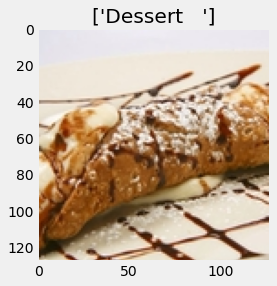

In [ ]:
# #Predictions:

# categories = os.listdir('/content/drive/MyDrive/Karent/Cgas project/training_cat')

# # preprocessing
# img = keras.preprocessing.image.load_img('/content/drive/MyDrive/Karent/Cgas project/testing_cat/Vegetable_Fruit/Vegetable_Fruit_1.jpg', target_size=(128, 128))
# x = keras.preprocessing.image.img_to_array(img)
# x = np.expand_dims(x, axis=0)
# x = keras.utils.normalize(x)

# # make prediction
# preds = base_model.predict(x)
# print("Model predicts a \"{}\" with {:.2f}% probability".format(categories[np.argmax(preds[0])], preds[0][np.argmax(preds)] * 100))


########################################################################################################################
#_____________________________________________________Image Prediction Tests:___________________________________________ 
########################################################################################################################



#========================
#Recieve The Image To Predict Heres

image = cv2.imread('/content/drive/MyDrive/Karent/Cgas project/testing_cat/Dessert/Dessert_0.jpg')

#Adding The RGB:
img = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
image=img

#Resizing The mages If Not in Already:
newsize = (128, 128,3) 
img.resize(newsize)


#Prediction Tests Heres after REshaping:
img = np.reshape(img, ((-1,128, 128, 3)))
y = model.predict(img)

#Getting The Label
inverted = label_encoder.inverse_transform([argmax(y)]) 


#Disply the Image And Label
plt.imshow(image)
plt.title(inverted)
plt.grid(False)
plt.show()





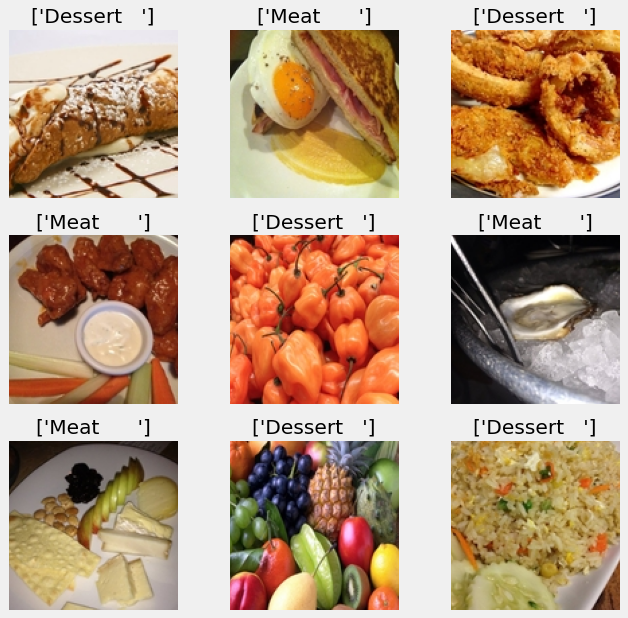

In [ ]:
images=["/content/drive/MyDrive/Karent/Cgas project/testing_cat/Dessert/Dessert_0.jpg",
        "/content/drive/MyDrive/Karent/Cgas project/testing_cat/Egg/Egg_0.jpg",
        "/content/drive/MyDrive/Karent/Cgas project/testing_cat/Fried food/Fried food_10.jpg",
        "/content/drive/MyDrive/Karent/Cgas project/testing_cat/Meat/Meat_10.jpg",
        "/content/drive/MyDrive/Karent/Cgas project/testing_cat/Vegetable_Fruit/Vegetable_Fruit_0.jpg",
        "/content/drive/MyDrive/Karent/Cgas project/testing_cat/Seafood/Seafood_0.jpg",
        "/content/drive/MyDrive/Karent/Cgas project/testing_cat/dairy_product/dairy_product_0.jpg",
        "/content/drive/MyDrive/Karent/Cgas project/testing_cat/Vegetable_Fruit/Vegetable_Fruit_101.jpg",
        "/content/drive/MyDrive/Karent/Cgas project/testing_cat/Rice/Rice_1.jpg"
        ]


from PIL import Image
j = 0
plt.figure(figsize=(10,10))
for i in images:
  img = cv2.imread(i)
  img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
  newsize = (128, 128,3)
  img.resize(newsize)
  img = np.reshape(img, ((-1,128, 128, 3)))
  y = model.predict(img)
  inverted = label_encoder.inverse_transform([argmax(y)]) 
  img = cv2.imread(i)
  img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
  plt.subplot(3,3,j+1)
  j = j + 1
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
  plt.title(inverted)
  plt.grid(False)
plt.show()

In [ ]:
np.random.choice(data,4)

In [ ]:
########################################################################################################################
#_____________________________________________________Test Score & Accuracy Check:___________________________________________ 
########################################################################################################################

score = model.evaluate(test_set)
print('Test Loss:', score[0])
print('Test accuracy:', score[1])


17/17 [==============================] - 8s 444ms/step - loss: 2.1857 - acc: 0.3233
Test Loss: 2.185673475265503
Test accuracy: 0.3232745826244354


In [ ]:
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

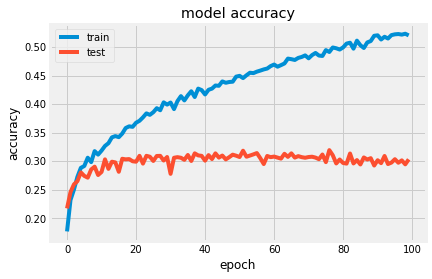

In [ ]:
########################################################################################################################
#_____________________________________________________Model Accuracy Plot:___________________________________________ 
########################################################################################################################



plt.plot(history_dict['acc'])
plt.plot(history_dict['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

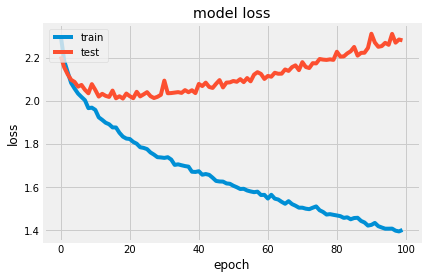

In [ ]:
########################################################################################################################
#_____________________________________________________Model Losss Plot:___________________________________________ 
########################################################################################################################


# dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

plt.plot(history_dict['loss'])
plt.plot(history_dict['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()



#======================================================   END   =============================================================

#**Folder Organize:**

In [ ]:
#Make A new Folder For 11 Cateogories

#Folder Vice Distribution Of Cateogory Images


# dict_cat={"0":"bread",
#              "1":"dairy_product",
#              "2":"Dessert",
#              "3":"Egg",
#              "4": "Fried food",
#              "5": "Meat",
#              "6":"Noodles_Pasta",
#              "7":"Rice",
#              "8": "Seafood",
#              "9":"Soup", 
#              "10":"Vegetable_Fruit"
         
#          }
# list(dict_cat.values())
# os.mkdir('/content/drive/MyDrive/Karent/VGG16Test')
# os.mkdir('/content/drive/MyDrive/Karent/VGG16Test/testing_cat')
# os.mkdir('/content/drive/MyDrive/Karent/VGG16Test/training_cat')

# for names in list(dict_cat.values()):
#   os.mkdir('/content/drive/MyDrive/Karent/VGG16Test/testing_cat/'+names)
#   os.mkdir('/content/drive/MyDrive/Karent/VGG16Test/training_cat/'+names)

 



In [ ]:
#This Code is to Move THe Images To Their Respective Crteogories:


# path = "/content/drive/MyDrive/Karent/training_ot"
# outPath="/content/drive/MyDrive/Karent/Cgas project/training_cat"    
# #Fetch From The Directory Path   training_ot
# dirs = os.listdir( path )


# #The 11 categories are:

# # dict_cat={"0":"bread",
# #              "1":"dairy_product",
# #              "2":"Dessert",
# #              "3":"Egg",
# #              "4": "Fried food",
# #              "5": "Meat",
# #              "6":"Noodles_Pasta",
# #              "7":"Rice",
# #              "8": "Seafood",
# #              "9":"Soup", 
# #              "10":"Vegetable_Fruit"
         
# #          }


# def copyToFolders():
#     for file in dirs:
#         #Getting The Full Path  
#         filePaths=path+"/"+file
        
        
#         #Get the Extension And Name Heres
#         file_Name,extension = os.path.basename(filePaths).split(".")
      
#         #Save To The OutPath
#         folder_name=str(file_Name.split("_")[0])
#         i=1
#         if(len(file_Name.split("_"))==3):#Means 2 Names Adjav=cent
#             folder_name=str(file_Name.split("_")[0]+"_"+file_Name.split("_")[1])
#             i=2 
      
#         final_path=outPath+"/"+folder_name+"/"+folder_name+"_"+file_Name.split("_")[i]+"."+extension
#         # print(final_path)
#         copyfile(filePaths, final_path)
        
        

# copyToFolders()
# print("Preprocessing Heres.................... ")

In [ ]:
# #This Code is For PreProcessing Of Images:


# path = "C:/Users/Lokesh/Downloads/archive (1)/food-11/evaluation"
# outPath="C:/Users/Lokesh/Downloads/archive (1)/food-11/eval_ot"    
# #Fetch From The Directory Path
# dirs = os.listdir( path )

# #The 11 categories are:

# dict_cat={"0":"bread",
#              "1":"dairy_product",
#              "2":"Dessert",
#              "3":"Egg",
#              "4": "Fried food",
#              "5": "Meat",
#              "6":"Noodles_Pasta",
#              "7":"Rice",
#              "8": "Seafood",
#              "9":"Soup", 
#              "10":"Vegetable_Fruit"
         
#          }


# #Functions To Resize The Imaages :
# def resize():

        """
        Image Preprocessing Code
        
        """
#     for file in dirs:
#         #Getting The Full Path  
#         filePaths=path+"/"+file
        
#         #Fetch The Images
#         im = Image.open(filePaths)
        
#         #Get the Extension And Name Heres
#         file_Name,extension = os.path.basename(filePaths).split(".")

#         #Set the ANTIALIAS for the Inverse Resizing Of Image
#         imResize = im.resize((128,128), Image.ANTIALIAS)
#         #Quality Can Be ALtered Depending On The Requirements
        
      
#         #Save To The OtPath
#         imResize.save(outPath+"/"+(dict_cat[str(file_Name.split("_")[0])]+"_"+file_Name.split("_")[1])+"."+extension, quality=100)
        

# resize()
# print("Preprocessing Heres.................... ")